# Titre


# Desctiprtiond de la dataset

# Sommaire 

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
import os
from urllib import request
import sys
import datetime

%matplotlib inline
sns.set_style("darkgrid") 
sns.set_context("notebook")

In [2]:
FILE = Path('__file__').resolve()
ROOT = FILE.parents[0]  # DATA-SCUENCE-PROJECTS root directory
if ROOT.as_posix() not in sys.path:
    sys.path.append(ROOT.as_posix())  # add ROOT to PATH
# ROOT = ROOT.relative_to(Path.cwd())

## Get the Data
### Download the Data

Une approche pour obtenir cette archive (ensemble de données) consiste à utiliser nos navigateurs web pour la télécharger, puis à copier le fichier CSV dans le répertoire de notre projet. Toutefois, il est recommandé de créer une fonction simple pour effectuer cette tâche. Cela devient particulièrement utile si les données évoluent régulièrement, car nous aurons alors un petit script que nous pourrons exécuter chaque fois que nous voudrons récupérer la dernière version des données, voire même le programmer pour qu'il s'exécute automatiquement à des intervalles réguliers. L'automatisation du processus de récupération des données est également avantageuse si nous devons les installer sur plusieurs machines.

In [3]:
FILE_NAME = "paris_housing.csv"
DATA_URL  = "https://www.data.gouv.fr/fr/datasets/r/d72d537a-2f7f-40af-bf1a-289ee25d5ae9"
SAVE_PATH = ROOT / "datasets"

def fetch_housing_data(data_url=DATA_URL, save_path=SAVE_PATH, file_name=FILE_NAME, add_date=False):
    save_path =  Path(save_path)
    name, extension = os.path.splitext(file_name)
    save_path.mkdir(parents=True, exist_ok=True)
    date = datetime.datetime.now().strftime("%Y-%m-%d")
    try:
        request.urlretrieve(data_url, save_path / Path(name + (f'_{date}_' if add_date else "") + extension))
    except Exception as e:
        print(e)
        sys.exit()
    

In [105]:
fetch_housing_data(data_url=DATA_URL, save_path=SAVE_PATH, file_name=FILE_NAME, add_date=False)

In [4]:
paris_housing = pd.read_csv(SAVE_PATH / FILE_NAME, sep=';')

## Examine the structure of the data 

Cette étape implique de fournir un aperçu succinct de la base de données, en mettant en évidence les variables de chaque échantillon (loyer), ainsi que des informations sur les données telles que leur type, le nombre de valeurs manquantes pour chaque variable, et quelques statistiques intéressantes pour une première visualisation, telles que le nombre d'échantillons, la moyenne, le maximum, le minimum et les quartiles des variables.

In [5]:
paris_housing_ = paris_housing.copy()

In [6]:
paris_housing_.head(5)

,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d
0,2019,2,5,Gaillon,1,1946-1970,non meublé,31.8,38.2,22.3,PARIS,7510205,"{""coordinates"": [[[2.336320212305948, 48.86797...","48.86930663808874,2.333431807658116"
1,2019,2,5,Gaillon,1,1971-1990,non meublé,27.4,32.9,19.2,PARIS,7510205,"{""coordinates"": [[[2.336320212305948, 48.86797...","48.86930663808874,2.333431807658116"
2,2019,8,57,Saint-Lambert,3,Apres 1990,meublé,26.2,31.4,18.3,PARIS,7511557,"{""coordinates"": [[[2.304248796649131, 48.84040...","48.834293628369785,2.296919974448867"
3,2019,2,3,Palais-Royal,4,Apres 1990,meublé,29.8,35.8,20.9,PARIS,7510103,"{""coordinates"": [[[2.339465868602756, 48.86213...","48.86465997810256,2.3363089189653103"
4,2019,4,17,Saint-Victor,2,1971-1990,non meublé,22.5,27.0,15.8,PARIS,7510517,"{""coordinates"": [[[2.354921992333764, 48.84377...","48.84766363545049,2.3540931533776894"


In [7]:
paris_housing_.info(), paris_housing_.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   annee                10240 non-null  int64  
 1   id_zone              10240 non-null  int64  
 2   id_quartier          10240 non-null  int64  
 3   nom_quartier         10240 non-null  object 
 4   piece                10240 non-null  int64  
 5   epoque               10240 non-null  object 
 6   meuble_txt           10240 non-null  object 
 7   ref                  10240 non-null  float64
 8   max                  10240 non-null  float64
 9   min                  10240 non-null  float64
 10  ville                10240 non-null  object 
 11  code_grand_quartier  10240 non-null  int64  
 12  geo_shape            10240 non-null  object 
 13  geo_point_2d         10240 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


(None, (10240, 14))

In [8]:
paris_housing_.describe()

,annee,id_zone,id_quartier,piece,ref,max,min,code_grand_quartier
count,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,10240.000000,1.024000e+04
mean,2020.500000,6.662500,40.500000,2.500000,25.829805,30.996164,18.082487,7.511090e+06
std,1.118089,4.224966,23.093334,1.118089,4.202257,5.042818,2.941352,5.997236e+02
min,2019.000000,1.000000,1.000000,1.000000,14.300000,17.160000,10.010000,7.510101e+06
25%,2019.750000,3.000000,20.750000,1.750000,23.000000,27.600000,16.100000,7.510596e+06
50%,2020.500000,5.000000,40.500000,2.500000,25.500000,30.600000,17.850000,7.511090e+06
75%,2021.250000,11.000000,60.250000,3.250000,28.500000,34.200000,19.950000,7.511585e+06
max,2022.000000,14.000000,80.000000,4.000000,39.600000,47.520000,27.720000,7.512080e+06


In [9]:
# # Variables Qualitatives
# for col in paris_housing_.select_dtypes('object'):
#     print(f'{"="*20} {col} {"="*20}')
#     print(f'{paris_housing.loc[:, col].unique()} \n')

In [10]:
for col in paris_housing.select_dtypes('object'):
    print(f'{"="*20} {col} {"="*20}')
    print(paris_housing.loc[:, col].value_counts(), '\n')

==================== nom_quartier ====================
Gaillon                  128
Saint-Lambert            128
Saint-Vincent-de-Paul    128
Saint-Thomas-d'Aquin     128
Parc-de-Montsouris       128
                        ... 
Faubourg-Montmartre      128
Chaussée-d'Antin         128
Val-de-Grace             128
Champs-Elysées           128
Belleville               128
Name: nom_quartier, Length: 80, dtype: int64 

==================== epoque ====================
1946-1970     2560
1971-1990     2560
Apres 1990    2560
Avant 1946    2560
Name: epoque, dtype: int64 

==================== meuble_txt ====================
non meublé    5120
meublé        5120
Name: meuble_txt, dtype: int64 

==================== ville ====================
PARIS    10240
Name: ville, dtype: int64 

==================== geo_shape ====================
{"coordinates": [[[2.336320212305948, 48.8679713890312], [2.335869054057415, 48.866996626507536], [2.333675321300196, 48.867516125009374], [2.331726012144796,

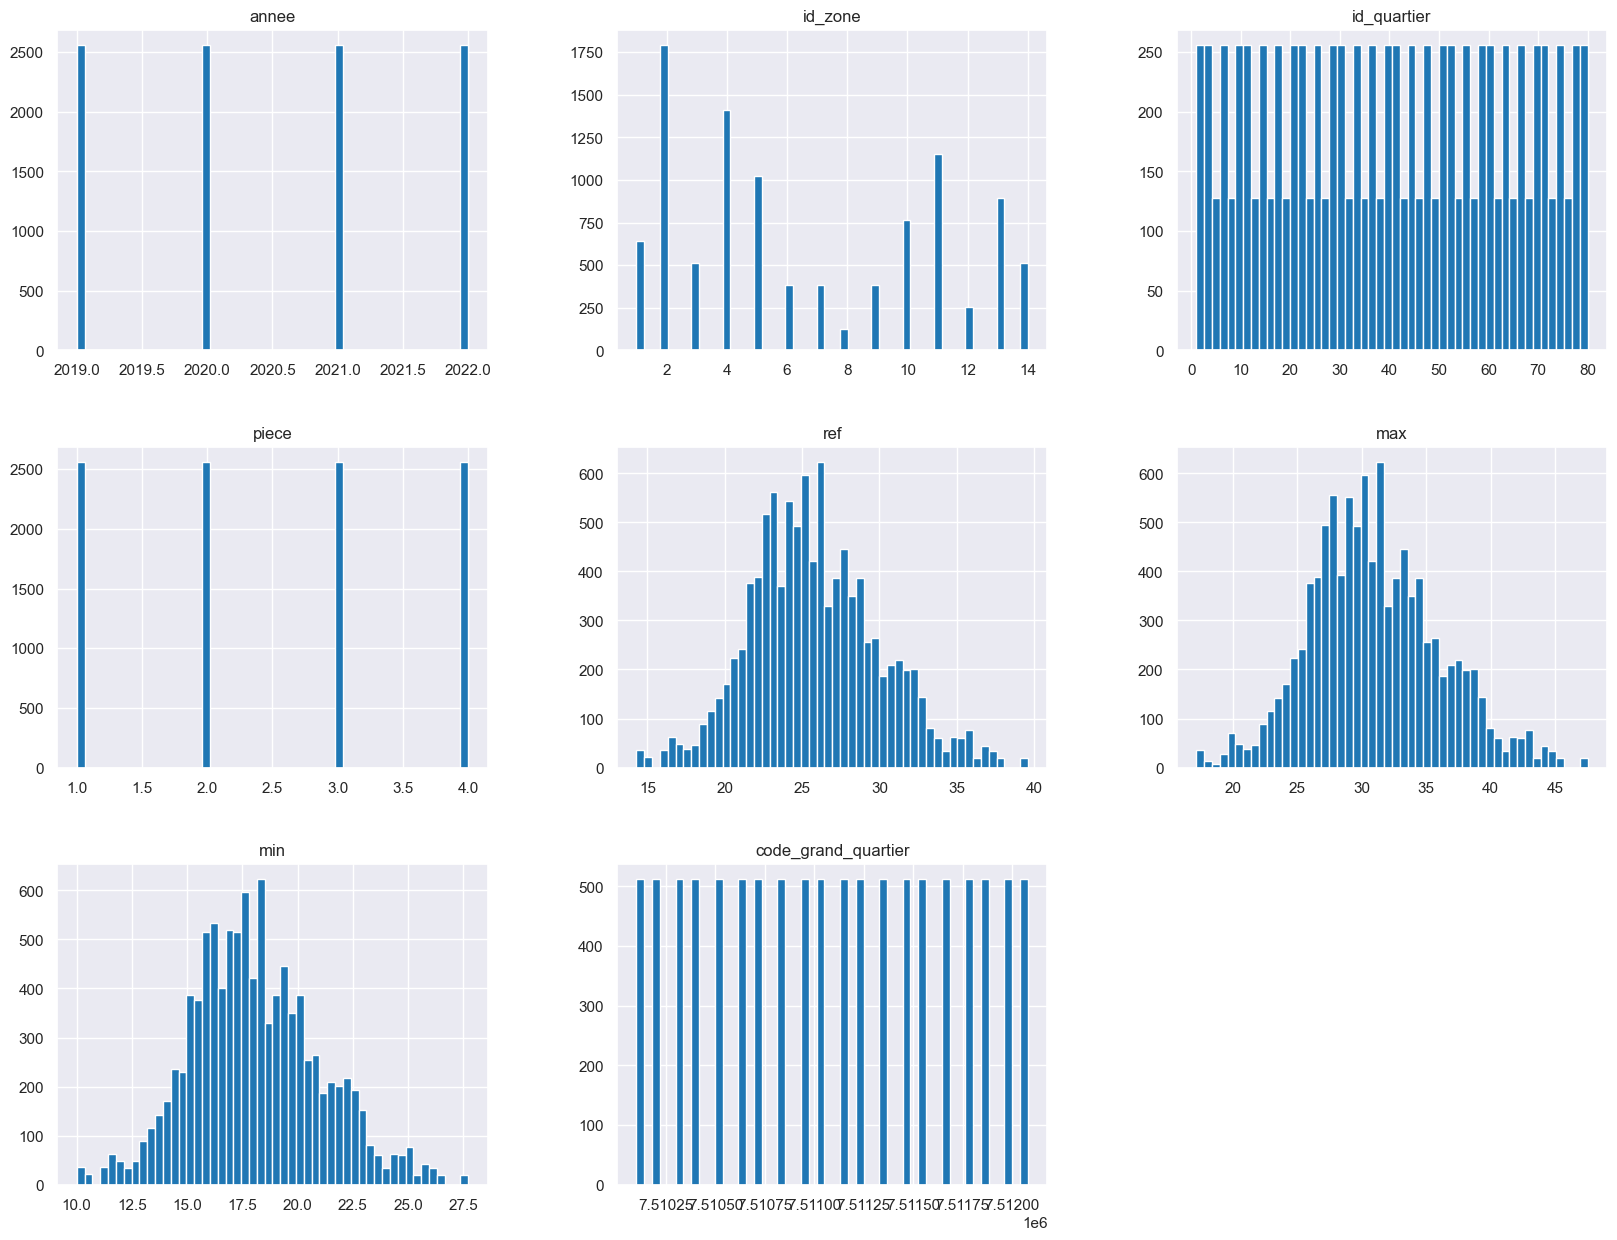

In [11]:
paris_housing_.hist(bins=50, figsize=(20, 15))
plt.show()

In [12]:
print(f"ref max = {paris_housing_.ref.max()} \nref min = {paris_housing_.ref.min()}")

ref max = 39.6 
ref min = 14.3


En observant les histogrammes, plusieurs observations peuvent être faites :

Tout d'abord, les variables `ref`, `max` et `min`, qui représentent respectivement les prix de loyer de référence, les prix de loyer maximum et minimum, semblent être exprimées en euros et ne sont ni plafonnées ni échelonnées, contrairement à la plupart des bases de données. D'autre part, on peut noter que ces données ont été mises à l’échelle (une unité correspond environ à 10 000 €). Travailler sur des variables prétransformées est pratique courante en apprentissage automatique : ce n’est pas nécessairement un problème, mais nous devons essayer de comprendre comment les données ont été calculée

 Les prix de loyer les plus élevés atteignent `450 000 €`, tandis que les prix de loyer les plus bas sont d'environ `100 000 €`. La distribution de ces variables suit une loi normale (gaussienne ou courbe en cloche), ce qui permet de les représenter uniquement par leur moyenne et leur variance.

Les variables `annee`, `piece` et `code_grand_cartier` suivent une distribution uniforme. Cela signifie que pour chaque année, le nombre d'échantillons (loyers) est le même, de même que pour chaque nombre de pièces et chaque code de grand quartier.

Ces variables ont des échelles très différentes. Nous aborderons ce cas ultérieurement et discuterons du principe de normalisation. Il est également remarqué que de nombreux histogrammes sont fortement dissymétriques : ils s'étendent beaucoup plus loin à droite de la médiane qu'à gauche. Certains algorithmes d'apprentissage peuvent avoir plus de difficulté à détecter des structures dans ces cas. Par conséquent, nous tenterons de transformer ces variables afin d'obtenir une distribution plus proche d'une courbe en cloche parfaite.

## Create a Test Set


Créer un jeu de test est théoriquement simple : il faut choisir au hasard certains éléments, en général 20% du jeu de données (ou moins si notre jeu de données est très grand) et les mettre de côté. Une solution consiste à sauvegarder le jeu de test lors de la première exécution, puis à le charger lors des exécutions suivantes. Une autre solution consiste à définir le germe (en anglais, seed) du générateur de nombres aléatoires (p. ex. en tapant `np.random.seed(42)` avant d’appeler `np.random.permutation()`), afin qu’il génère toujours la même suite d’indices pseudo-aléatoires. Mais ces deux solutions ne fonctionneront plus après une mise à jour de notre jeu de données. Afinn de garantir une séparation stable entre données d’entraînement et données de test même après la mise à jour du jeu de données, on peut alors utiliser l’identiant de chaque observation pour décider si celle-ci doit ou non figurer dans le jeu de test (nous supposerons que les observations ont un identificateur unique et immuable). Par exemple, nous pouvons calculer un hachage de l’identicateur de chaque observation, et mettre l’observation dans le jeu de test si le hachage est inférieur ou égal à 20% du hachage maximal. Ainsi, le jeu de test restera cohérent sur l’ensemble des exécutions, même si vous rafraîchissez le jeu de données : le nouveau jeu de test contiendra 20% des nouvelles observations, ainsi que toutes celles qui étaient déjà auparavant dans le jeu de test

In [13]:
from zlib import crc32

def test_set_check(id, test_rat):
    assert 0 <= test_rat <= 100, 'The rate of the parameter "test_rat" must be between [0, 100].'
    test_rat = test_rat if 0 <= test_rat <= 1 else test_rat/100
    return crc32(np.int64(id)) & 0xffffffff < test_rat * 2**32
    # return bytearray(hash(np.int64(id)).digest())[-1] < 256 * test_rat

def split_train_test(data, test_rat, by=None):
    data, by = (data.reset_index(), 'index') if by==None else (data, by) # adds an `index` column
    in_test_set = data[by].apply(lambda id_: test_set_check(id_, test_rat))
    return data.loc[~in_test_set, :], data.loc[in_test_set, :]

In [14]:
train_set, test_set = split_train_test(data=paris_housing_, test_rat=0.2, by=None)
train_set.shape, test_set.shape

((8192, 15), (2048, 15))

Jusqu’ici nous ne nous sommes intéressés qu’à des méthodes d’échantillonnage purement aléatoires. C’est en général satisfaisant si notre jeu de données est assez important (avec en particulier beaucoup plus d’observations que de variables), mais si ce n’est pas le cas, nous risquons d’introduire un biais d’échantillonnage non négli-geable.Afin d'évaluer la qualité de l'échantillonnage, nous allons créer une variable appelée ref_cat qui classe les prix des loyers en sept catégories :  
    - Catégorie 1 : loyers de 10 € à 15 €  
    - Catégorie 2 : loyers de 15 € à 20 €  
    - Catégorie 3 : loyers de 20 € à 25 €  
    - Catégorie 4 : loyers de 25 € à 30 €  
    - Catégorie 5 : loyers de 30 € à 35 €  
    - Catégorie 6 : loyers de 35 € à 40 €  
    - Catégorie 7 : loyers de 40 € et plus  
Nous allons ensuite visualiser la répartition de ces catégories entre l'ensemble de données d'origine et les ensembles de données d'entraînement et de test. Pour un échantillonnage de meilleure qualité, nous souhaitons obtenir des distributions similaires par rapport à la population d'origine.  

In [15]:
paris_housing_['ref_cat'] = pd.cut(paris_housing_['ref'],
                                  bins=[10., 15., 20., 25., 30., 35, 40, np.inf],
                                  labels=[1, 2, 3, 4, 5, 6, 7])
train_set, test_set = split_train_test(data=paris_housing_, test_rat=0.2, by=None)
train_set.shape, test_set.shape

((8192, 16), (2048, 16))

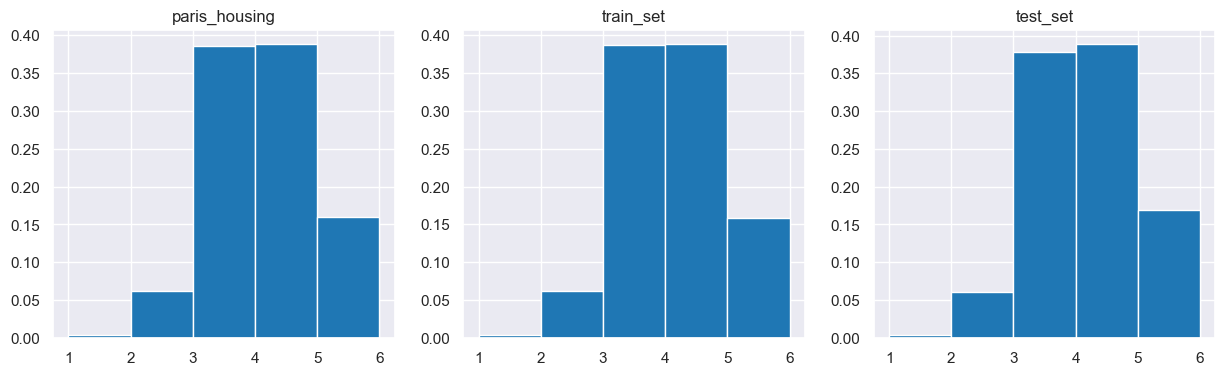

In [16]:
sets_name = ['paris_housing', 'train_set', 'test_set']
fig, axes = plt.subplots(1, len(sets_name), figsize=(15, 4))
for ax, set, name in zip(axes.flatten(), [paris_housing_, train_set, test_set], sets_name):
    set.ref_cat.hist(bins=5, density=True, ax=ax)
    ax.set_title(name)

In [17]:
data = {'ref_cat_paris_housing': paris_housing_.ref_cat.value_counts() / len(paris_housing_), 
        'ref_cat_train_set': train_set.ref_cat.value_counts() / len(train_set), 
        'ref_cat_test_set': test_set.ref_cat.value_counts() / len(test_set)}
df_ = pd.DataFrame(data=data, index=test_set.ref_cat.unique().sort_values()).sort_index()
df_

,ref_cat_paris_housing,ref_cat_train_set,ref_cat_test_set
1,0.004102,0.004150,0.003906
2,0.062012,0.062256,0.061035
3,0.385742,0.387695,0.377930
4,0.387988,0.387939,0.388184
5,0.133691,0.131958,0.140625
6,0.026465,0.026001,0.028320


Les distributions des catégories de la variable `ref_cat` présentent une forte similarité, ce qui est encourageant. Cependant, afin d'améliorer encore davantage la précision de nos algorithmes d'apprentissage automatique, il serait préférable de viser une distribution parfaite. Cela augmenterait la probabilité de sélectionner nos données avec une grande précision.

Pour atteindre cet objectif, nous allons utiliser une méthode d'échantillonnage stratifié. Cette méthode permet une division stratifiée de nos données en ensembles d'entraînement et de test. Elle garantit que la distribution des catégories ou classes est maintenue de manière équilibrée dans les deux ensembles.

En utilisant un échantillonnage stratifié, nous nous assurons que les ensembles d'entraînement et de test reflètent fidèlement la répartition des catégories de la variable `ref_cat`. Cela contribue à une meilleure représentativité des données et permet aux algorithmes d'apprentissage automatique de mieux apprendre les relations et les modèles sous-jacents.

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(paris_housing_, paris_housing_["ref_cat"]):
    strat_train_set = paris_housing_.loc[train_index]
    strat_test_set = paris_housing_.loc[test_index]

strat_train_set.shape, strat_test_set.shape

((8192, 15), (2048, 15))

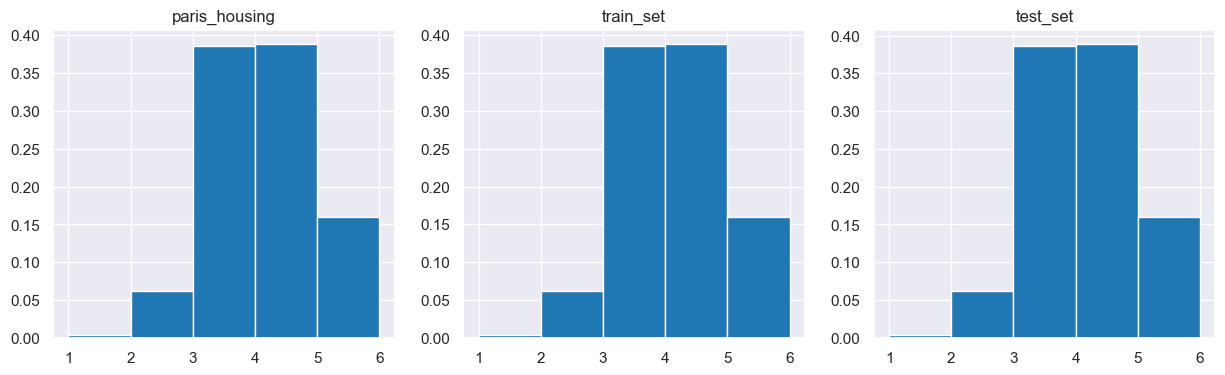

In [19]:
sets_name = ['paris_housing', 'train_set', 'test_set']
fig, axes = plt.subplots(1, len(sets_name), figsize=(15, 4))
for ax, set, name in zip(axes.flatten(), [paris_housing_, strat_train_set, strat_test_set], sets_name):
    set.ref_cat.hist(bins=5, density=True, ax=ax)
    ax.set_title(name)

In [20]:
data = {'ref_cat_paris_housing': paris_housing_.ref_cat.value_counts() / len(paris_housing_), 
        'ref_cat_train_set': strat_train_set.ref_cat.value_counts() / len(strat_train_set), 
        'ref_cat_test_set': strat_test_set.ref_cat.value_counts() / len(strat_test_set)}
df_ = pd.DataFrame(data=data, index=strat_test_set.ref_cat.unique().sort_values()).sort_index()
df_

,ref_cat_paris_housing,ref_cat_train_set,ref_cat_test_set
1,0.004102,0.004150,0.003906
2,0.062012,0.062012,0.062012
3,0.385742,0.385742,0.385742
4,0.387988,0.387939,0.388184
5,0.133691,0.133667,0.133789
6,0.026465,0.026489,0.026367


Les distributions des catégories sont maintenant remarquablement similaires, ce qui est très satisfaisant. Nous avons consciemment accordé une attention considérable à la création de notre jeu de test, car il s'agit d'un aspect souvent négligé mais essentiel d'un projet d'apprentissage automatique. Maintenant, il est temps de passer à l'étape suivante : l'exploration des données. Cette étape nous permettra de mieux comprendre la structure, les caractéristiques et les patterns présents dans nos données, ce qui est crucial pour prendre des décisions éclairées lors de la construction de nos modèles.

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("ref_cat", axis=1, inplace=True)
strat_train_set.shape, strat_test_set.shape

((8192, 14), (2048, 14))

## Discover and Visualize the Data to Gain Insights

In [22]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely.geometry
import json

In [23]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

Pour visualiser des données géométriques, nous utiliserons le package GeoPandas. Comme son nom l'indique, GeoPandas étend la bibliothèque de science des données populaire appelée pandas en ajoutant la prise en charge des données géospatiales. Grâce à GeoPandas, nous pourrons manipuler, analyser et représenter graphiquement des données qui ont une composante géographique ou spatiale, telle que des coordonnées géographiques, des formes de polygones, des points sur une carte, etc. Cette extension nous permettra d'explorer et de visualiser facilement des informations géographiques dans nos données, ou de créer des cartes interactives pour une meilleure compréhension visuelle.  

La structure de données centrale dans `GeoPandas` est le `geopandas.GeoDataFrame`, une sous-classe de `pandas.DataFrame`, qui peut stocker des colonnes de géométrie et effectuer des opérations spatiales. Le `geopandas.GeoSeries`, une sous-classe de `pandas.Series`, gère les géométries. Ainsi, notre `GeoDataFrame` est une combinaison de `pandas.Series`, avec des données traditionnelles (numériques, booléennes, textuelles, etc.), et de `geopandas.GeoSeries`, avec des géométries (points, polygones, etc.). Nous pouvons avoir autant de colonnes avec des géométries que nous le souhaitons.  

Pour créer un `GeoDataFrame`, nous devons spécifier la variable `geometry`. Cette variable peut contenir des coordonnées de `latitude` et de `longitude` pour localiser des points, ainsi que des `polygones` pour créer une carte représentant des surfaces dans l'espace géométrique.

In [24]:
# housing['longitude'] = housing['geo_point_2d'].apply(lambda x: float(x.split(',')[0]))
# housing['latitude'] = housing['geo_point_2d'].apply(lambda x: float(x.split(',')[1]))
# housing['geo_shape_json'] = housing['geo_shape'].apply(json.loads) 
# housing = housing.assign(pays='FRANCE')

# gdf =  geopandas.GeoDataFrame(
#     housing, 
#     # geometry = geopandas.points_from_xy(housing.longitude, housing.latitude),
#     geometry = housing.geo_shape_json.apply(shapely.geometry.shape), 
#     crs="EPSG:4326"
# )
# gdf["area"] = gdf.area
# gdf["area"]
# gdf["boundary"] = gdf.boundary
# gdf["boundary"]
# gdf["centroid"] = gdf.centroid
# gdf["centroid"]

# gdf.head(5)

In [29]:
# Create 'longitude' and 'latitude' columns
housing[['longitude', 'latitude']] = housing['geo_point_2d'].str.split(',', expand=True).astype(float)

# Convert 'geo_shape' column to geometry
housing['geometry'] = housing['geo_shape'].apply(json.loads).apply(shapely.geometry.shape)

# Create GeoDataFrame with the necessary columns
gdf = geopandas.GeoDataFrame(housing, geometry='geometry', crs='EPSG:4326')

# Calculate the area of each geographical entity
gdf['area'] = gdf.geometry.area

# Calculate the boundary of each geographical entity
gdf['boundary'] = gdf.geometry.boundary

# Calculate the centroid of each geographical entity
gdf['centroid'] = gdf.geometry.centroid

# Display the 'area', 'boundary', and 'centroid' columns
# area_values = gdf['area']
# boundary_values = gdf['boundary']
# centroid_values = gdf['centroid']

gdf.head(5)

C:\Users\Brani\AppData\Local\Temp\ipykernel_21716\2948103623.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.geometry.area
C:\Users\Brani\AppData\Local\Temp\ipykernel_21716\2948103623.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


,annee,id_zone,id_quartier,nom_quartier,piece,epoque,meuble_txt,ref,max,min,ville,code_grand_quartier,geo_shape,geo_point_2d,longitude,latitude,geometry,area,boundary,centroid
2949,2019,14,45,Bel-Air,4,Apres 1990,non meublé,20.9,25.10,14.60,PARIS,7511245,"{""coordinates"": [[[2.4138796243107192, 48.8335...","48.837995646121755,2.4331784419569793",48.837996,2.433178,"POLYGON ((2.41388 48.83357, 2.41401 48.83357, ...",0.000732,"LINESTRING (2.41388 48.83357, 2.41401 48.83357...",POINT (2.43318 48.83800)
766,2019,5,52,Croulebarbe,4,1971-1990,meublé,24.3,29.20,17.00,PARIS,7511352,"{""coordinates"": [[[2.3516626011261312, 48.8367...","48.8337336761222,2.347673046065809",48.833734,2.347673,"POLYGON ((2.35166 48.83678, 2.35176 48.83678, ...",0.000085,"LINESTRING (2.35166 48.83678, 2.35176 48.83678...",POINT (2.34767 48.83373)
209,2020,11,40,Hôpital-Saint-Louis,4,Apres 1990,non meublé,19.4,23.28,13.58,PARIS,7511040,"{""coordinates"": [[[2.372433913673534, 48.87610...","48.876008290020636,2.3681230178876818",48.876008,2.368123,"POLYGON ((2.37243 48.87611, 2.37359 48.87509, ...",0.000108,"LINESTRING (2.37243 48.87611, 2.37359 48.87509...",POINT (2.36812 48.87601)
198,2022,3,32,Europe,4,Apres 1990,non meublé,26.1,31.32,18.27,PARIS,7510832,"{""coordinates"": [[[2.31229340123256, 48.873300...","48.87814767585102,2.3171746113048832",48.878148,2.317175,"POLYGON ((2.31229 48.87330, 2.31152 48.87308, ...",0.000145,"LINESTRING (2.31229 48.87330, 2.31152 48.87308...",POINT (2.31717 48.87815)
9925,2019,12,56,Plaisance,4,1946-1970,meublé,20.9,25.10,14.60,PARIS,7511456,"{""coordinates"": [[[2.321133015885315, 48.83990...","48.83031704260008,2.3153049315734164",48.830317,2.315305,"POLYGON ((2.32113 48.83990, 2.32137 48.83978, ...",0.000219,"LINESTRING (2.32113 48.83990, 2.32137 48.83978...",POINT (2.31530 48.83032)


Maintenant que nous disposons des variables nécessaires, nous allons visualiser nos données géométriques à l'aide de la méthode `plot` de `GeoPandas`. Cette visualisation ne vise pas à montrer les belles rues de Paris ou la tour Eiffel. En revanche, nous pouvons découper Paris en petites zones et visualiser, par exemple, les prix des loyers dans une zone donnée, la population, etc. Cela nous permettra d'explorer et d'analyser des aspects spécifiques de Paris à l'échelle géographique, offrant ainsi des informations plus détaillées et des perspectives intéressantes.

<Axes: >

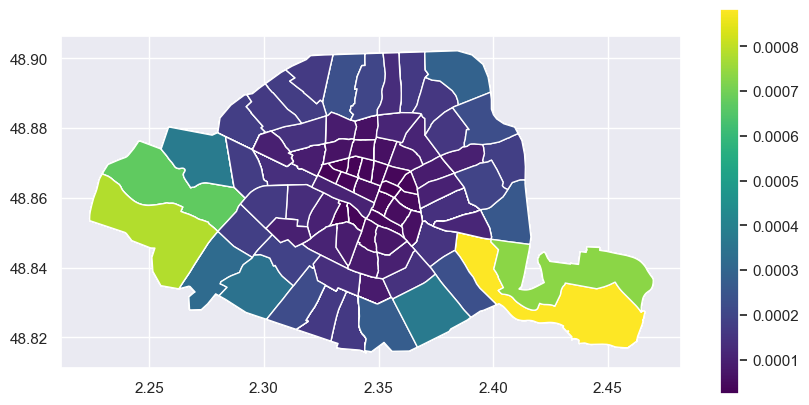

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
gdf.plot(column="area", legend=True, cmap ='viridis', ax=ax) # 'Reds'
# gdf["centroid"].plot(ax=ax, color="black")
# ax.set_title('blabla')

Cette représentation décrit les zones de Paris en fonction de leur surface. Elle offre une vue magnifique et nous permet d'obtenir plusieurs informations à partir de ce type de représentation. Par conséquent, la variable qui nous intéresse dans ce projet est `ref` (le prix du loyer). Nous pouvons désormais visualiser le prix du loyer en fonction de la zone géographique. Cela nous permettra d'explorer et de visualiser les relations et les tendances entre différentes variables, ce qui peut être très utile pour une analyse approfondie de notre jeu de données.  

En plus de représenter les prix du loyer en fonction des zones, nous allons également examiner le nombre d'échantillons par zone et par quartier. Cela nous permettra d'avoir une idée de la population des quartiers et des zones à Paris, une information qui n'est pas incluse dans le jeu de données mais qui est très importante pour l'estimation du prix du loyer. En analysant ces données supplémentaires, nous pourrons mieux comprendre les facteurs qui influencent les prix du loyer et faire des observations intéressantes sur la relation entre la population et les prix dans différentes zones et quartiers de Paris.  

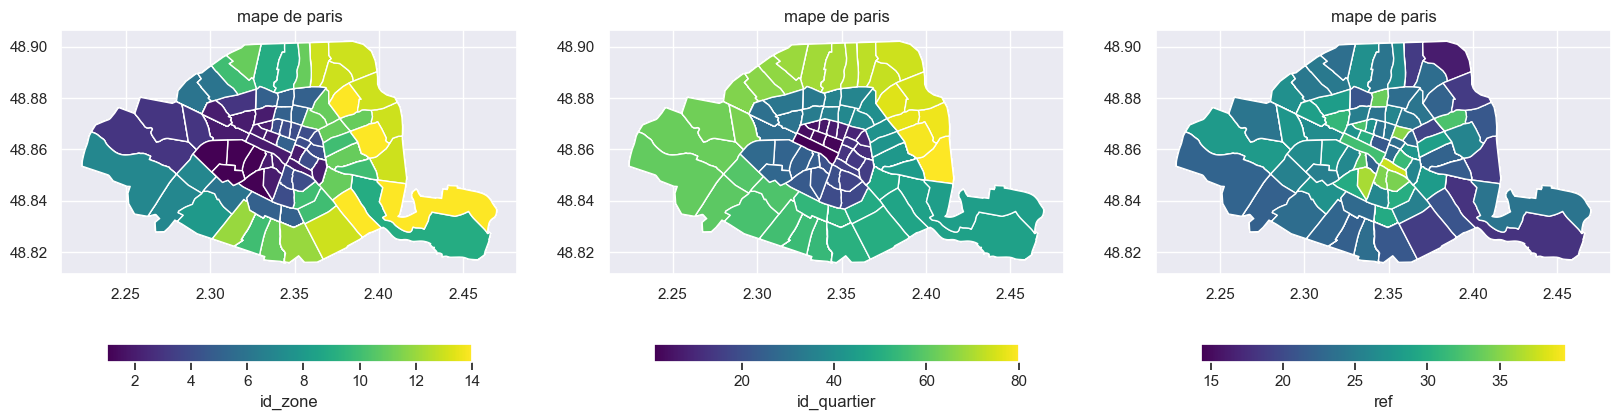

In [38]:
name_columns = ['id_zone', 'id_quartier', 'ref']
fig, axes = plt.subplots(1, len(name_columns), figsize=(20, 6))

for ax, col in zip(axes.flatten(), gdf.loc[:, name_columns]):
    gdf.plot(ax=ax, column=col, cmap='viridis', legend=True, 
            legend_kwds={'shrink': 0.8, # réduire la taille de la barre de couleur
                        'label': col, # ajouter un titre à la barre de couleur
                        'format': '%.0f',
                        'orientation': 'horizontal'}) # formater les valeurs de la barre de couleur)
    # gdf["centroid"].plot(ax=ax, color="black", markersize=gdf.ref)
    ax.set_title('mape de paris')


Nous pouvons conclure que la population est plus élevée dans l'est de Paris, notamment dans les 20ème, 19ème, 12ème et 11ème arrondissements. Cependant, les prix du loyer y sont moins chers. En revanche, dans l'ouest de Paris, notamment dans les 16ème, 15ème, 8ème et 7ème arrondissements, la population est moins dense, mais les prix du loyer sont très élevés. En ce qui concerne le centre de Paris, les arrondissements 1, 2, 3, 4 et 5 sont également moins peuplés, mais les prix du loyer y sont exorbitants. Cette observation met en évidence la corrélation complexe entre la population, la localisation géographique et les prix du loyer à Paris.  

Cette analyse serait encore plus perspicace et précise si nous disposions des pourcentages de population pour chaque zone. Cependant, en tant que data scientist, notre rôle est de trouver des astuces et des techniques pour explorer les données et en extraire des informations, même en l'absence de données directes ou complètes. Nous pouvons utiliser des méthodes indirectes telles que l'analyse des variables disponibles, la corrélation avec d'autres facteurs socio-économiques ou la segmentation de la population en fonction d'autres critères. L'objectif est de tirer le meilleur parti des données dont nous disposons et de fournir des insights pertinents malgré les limitations.  

### Search for correlations

Étant donné que le jeu de données est de taille raisonnable, nous pouvons facilement calculer le coefficient de corrélation (également appelé coefficient de corrélation de Pearson) entre chaque paire de variables en utilisant la méthode `corr()` de `pandas`. Cette mesure statistique permet d'évaluer la relation linéaire entre deux variables et fournit une indication de l'intensité et de la direction de cette relation. En calculant les coefficients de corrélation, nous pourrons déterminer si les variables sont positivement ou négativement corrélées, ainsi que l'intensité de cette corrélation. Cette analyse nous permettra de mieux comprendre les relations entre les différentes variables de notre jeu de données et d'identifier d'éventuels motifs ou tendances.

In [49]:
corr_matrix = gdf.corr()
corr_matrix.head(len(corr_matrix.columns))

C:\Users\Brani\AppData\Local\Temp\ipykernel_21716\137975572.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = gdf.corr()


,annee,id_zone,id_quartier,piece,ref,max,min,code_grand_quartier,longitude,latitude,area
annee,1.000000,0.008463,0.001649,-0.007582,0.072938,0.072819,0.072188,0.001746,-0.000210,0.008893,0.005494
id_zone,0.008463,1.000000,0.704650,0.003708,-0.556218,-0.556349,-0.556352,0.702364,0.010132,0.546033,0.345401
id_quartier,0.001649,0.704650,1.000000,0.005831,-0.413852,-0.413972,-0.414020,0.998914,0.192493,0.051379,0.470395
piece,-0.007582,0.003708,0.005831,1.000000,-0.549633,-0.549507,-0.549663,0.006254,0.002751,0.004776,-0.003445
ref,0.072938,-0.556218,-0.413852,-0.549633,1.000000,0.999996,0.999988,-0.414240,-0.075580,-0.338445,-0.201628
max,0.072819,-0.556349,-0.413972,-0.549507,0.999996,1.000000,0.999988,-0.414360,-0.075587,-0.338473,-0.201678
min,0.072188,-0.556352,-0.414020,-0.549663,0.999988,0.999988,1.000000,-0.414404,-0.075534,-0.338405,-0.201746
code_grand_quartier,0.001746,0.702364,0.998914,0.006254,-0.414240,-0.414360,-0.414404,1.000000,0.193110,0.051197,0.478194
longitude,-0.000210,0.010132,0.192493,0.002751,-0.075580,-0.075587,-0.075534,0.193110,1.000000,-0.028752,-0.232752
latitude,0.008893,0.546033,0.051379,0.004776,-0.338445,-0.338473,-0.338405,0.051197,-0.028752,1.000000,-0.033339


In [50]:
corr_matrix.ref.sort_values()

id_zone               -0.556218
piece                 -0.549633
code_grand_quartier   -0.414240
id_quartier           -0.413852
latitude              -0.338445
area                  -0.201628
longitude             -0.075580
annee                  0.072938
min                    0.999988
max                    0.999996
ref                    1.000000
Name: ref, dtype: float64

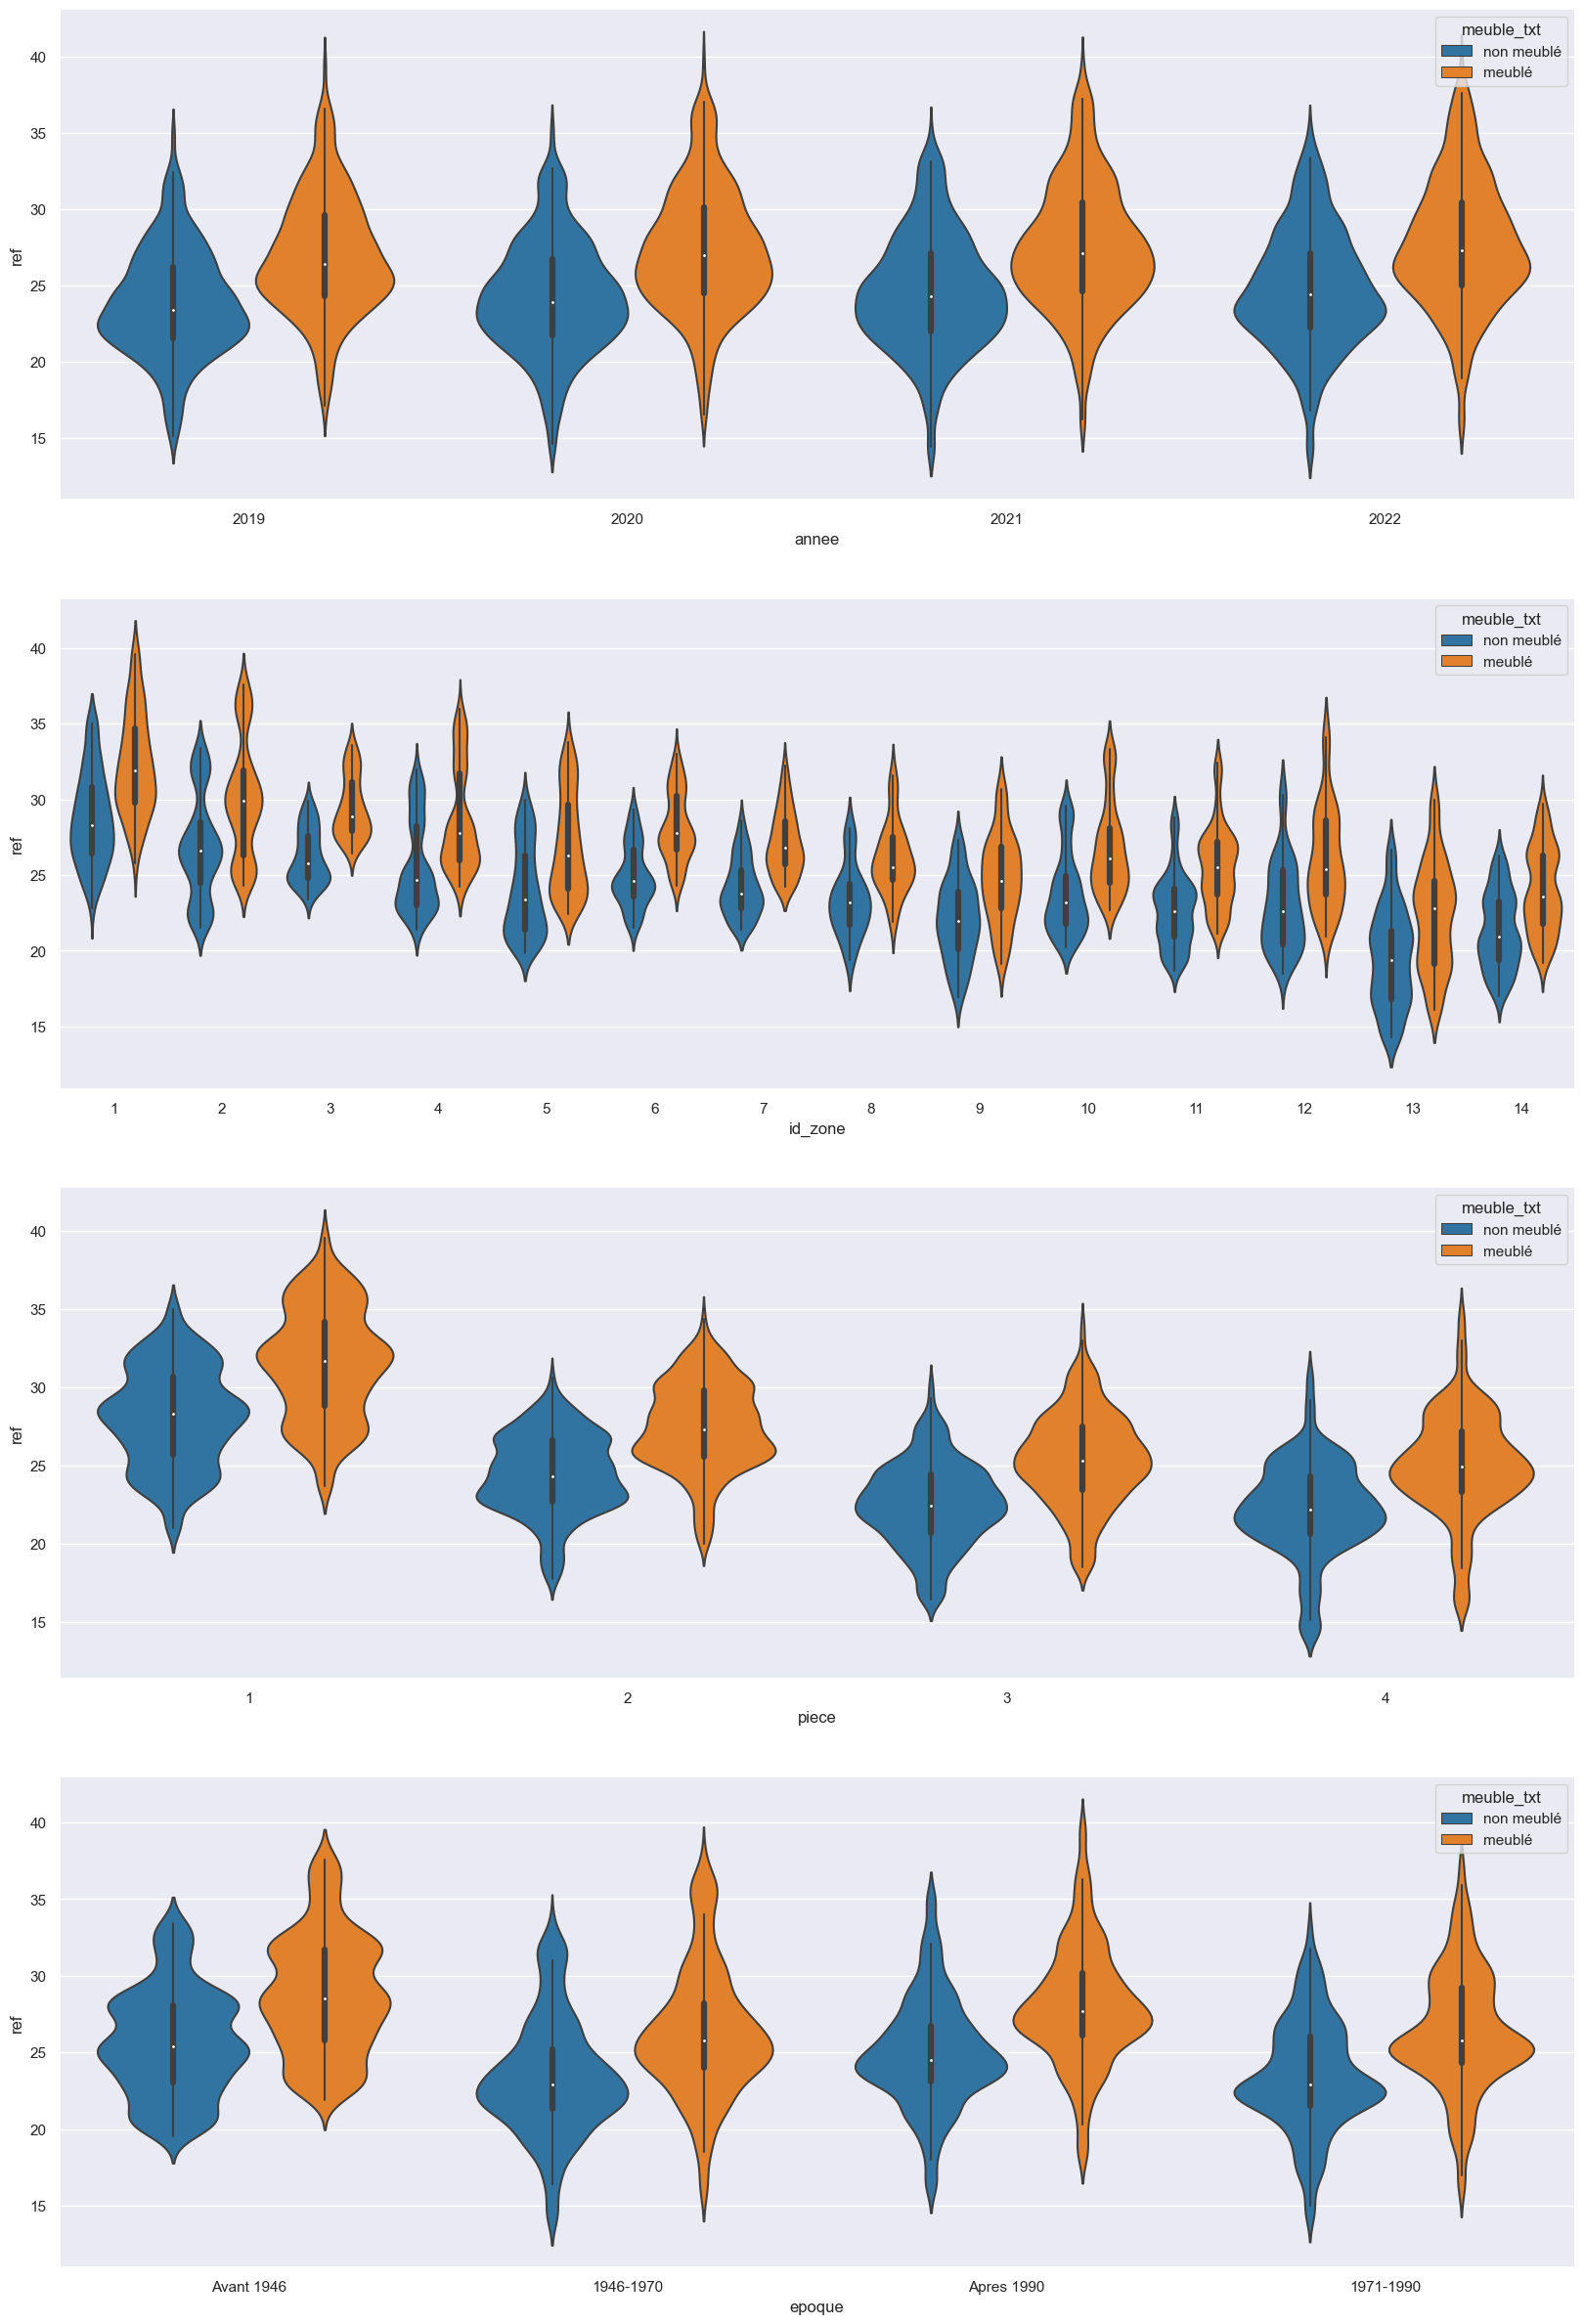

In [37]:
fig, axes = plt.subplots(4,1, figsize=(20, 30))
name_columns = ['annee', 'id_zone', 'piece', 'epoque']

for ax, nam_col in zip(axes.flatten(), name_columns):
    sns.violinplot(ax=ax, x=nam_col, y='ref', hue='meuble_txt', data=gdf, split=False)

annee
2019    25.344034
2020    25.726499
2021    26.024415
2022    26.233892
Name: ref, dtype: float64

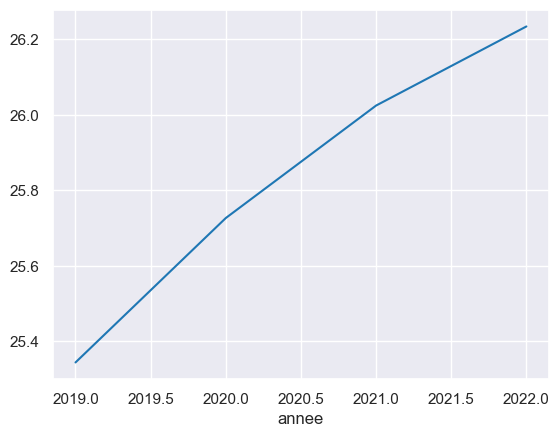

In [41]:
annee_mean = gdf.groupby(['annee']).ref.mean()
annee_mean.plot(kind='line', x='annee', y='ref')
annee_mean.head() 

In [43]:
# gdf.explore("area", legend=False)
gdf.groupby(['annee', 'meuble_txt']).mean()

C:\Users\Brani\AppData\Local\Temp\ipykernel_20244\1918166371.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['annee', 'meuble_txt']).mean()


id_zone  id_quartier     piece        ref        max  \
annee meuble_txt                                                          
2019  meublé      6.658000    40.000000  2.488000  26.928900  32.317900   
      non meublé  6.718872    40.281128  2.490272  23.802335  28.563327   
2020  meublé      6.704966    40.496592  2.511198  27.266894  32.720273   
      non meublé  6.638809    40.406340  2.494717  24.206820  29.048184   
2021  meublé      6.735610    40.692683  2.491707  27.452098  32.942517   
      non meublé  6.672098    40.632383  2.481670  24.534216  29.441059   
2022  meublé      6.788517    41.044019  2.475598  27.732249  33.278699   
      non meublé  6.606322    40.154215  2.487548  24.734100  29.680920   

                        min  code_grand_quartier  longitude  latitude  \
annee meuble_txt                                                        
2019  meublé      18.855900         7.511078e+06  48.861170  2.344910   
      non meublé  16.669358         7.511085e+06  48.860831  2.344116   
2020  meublé      19.086826         7.511090e+06  48.860715  2.344205   
      non meublé  16.944774         7.511088e+06  48.860581  2.343545   
2021  meublé      19.216468         7.511095e+06  48.861157  2.344715   
      non meublé  17.173951         7.511094e+06  48.861263  2.344201   
2022  meublé      19.412574         7.511105e+06  48.860757  2.344385   
      non meublé  17.313870         7.511082e+06  48.861387  2.343637   

                      area  
annee meuble_txt            
2019  meublé      0.000158  
      non meublé  0.000163  
2020  meublé      0.000159  
      non meublé  0.000162  
2021  meublé      0.000163  
      non meublé  0.000163  
2022  meublé      0.000165  
      non meublé  0.000159

## Looking for Correlations

In [54]:
corr_matrix = gdf.corr(numeric_only=True)
corr_matrix

,annee,id_zone,id_quartier,piece,ref,max,min,code_grand_quartier,longitude,latitude,area
annee,1.000000,0.001554,0.007625,-0.003938,0.079155,0.079030,0.078400,0.007702,0.004815,-0.002886,0.004362
id_zone,0.001554,1.000000,0.703946,-0.000195,-0.551793,-0.551915,-0.551915,0.701560,0.001708,0.548431,0.346478
id_quartier,0.007625,0.703946,1.000000,-0.005232,-0.404590,-0.404700,-0.404725,0.998919,0.186266,0.054368,0.467399
piece,-0.003938,-0.000195,-0.005232,1.000000,-0.552305,-0.552205,-0.552368,-0.005151,0.002413,0.003881,-0.001596
ref,0.079155,-0.551793,-0.404590,-0.552305,1.000000,0.999996,0.999988,-0.404514,-0.070055,-0.339788,-0.202747
max,0.079030,-0.551915,-0.404700,-0.552205,0.999996,1.000000,0.999988,-0.404624,-0.070051,-0.339804,-0.202792
min,0.078400,-0.551915,-0.404725,-0.552368,0.999988,0.999988,1.000000,-0.404652,-0.070039,-0.339766,-0.202894
code_grand_quartier,0.007702,0.701560,0.998919,-0.005151,-0.404514,-0.404624,-0.404652,1.000000,0.186744,0.053987,0.475339
longitude,0.004815,0.001708,0.186266,0.002413,-0.070055,-0.070051,-0.070039,0.186744,1.000000,-0.032098,-0.241585
latitude,-0.002886,0.548431,0.054368,0.003881,-0.339788,-0.339804,-0.339766,0.053987,-0.032098,1.000000,-0.021352


In [55]:
corr_matrix["ref"].sort_values(ascending=False)

ref                    1.000000
max                    0.999996
min                    0.999988
annee                  0.079155
longitude             -0.070055
area                  -0.202747
latitude              -0.339788
code_grand_quartier   -0.404514
id_quartier           -0.404590
id_zone               -0.551793
piece                 -0.552305
Name: ref, dtype: float64

array([[<Axes: xlabel='ref', ylabel='ref'>,
        <Axes: xlabel='area', ylabel='ref'>,
        <Axes: xlabel='latitude', ylabel='ref'>,
        <Axes: xlabel='id_quartier', ylabel='ref'>,
        <Axes: xlabel='id_zone', ylabel='ref'>,
        <Axes: xlabel='piece', ylabel='ref'>],
       [<Axes: xlabel='ref', ylabel='area'>,
        <Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='latitude', ylabel='area'>,
        <Axes: xlabel='id_quartier', ylabel='area'>,
        <Axes: xlabel='id_zone', ylabel='area'>,
        <Axes: xlabel='piece', ylabel='area'>],
       [<Axes: xlabel='ref', ylabel='latitude'>,
        <Axes: xlabel='area', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='id_quartier', ylabel='latitude'>,
        <Axes: xlabel='id_zone', ylabel='latitude'>,
        <Axes: xlabel='piece', ylabel='latitude'>],
       [<Axes: xlabel='ref', ylabel='id_quartier'>,
        <Axes: xlabel='area', ylabel='id_quartier'>,
    

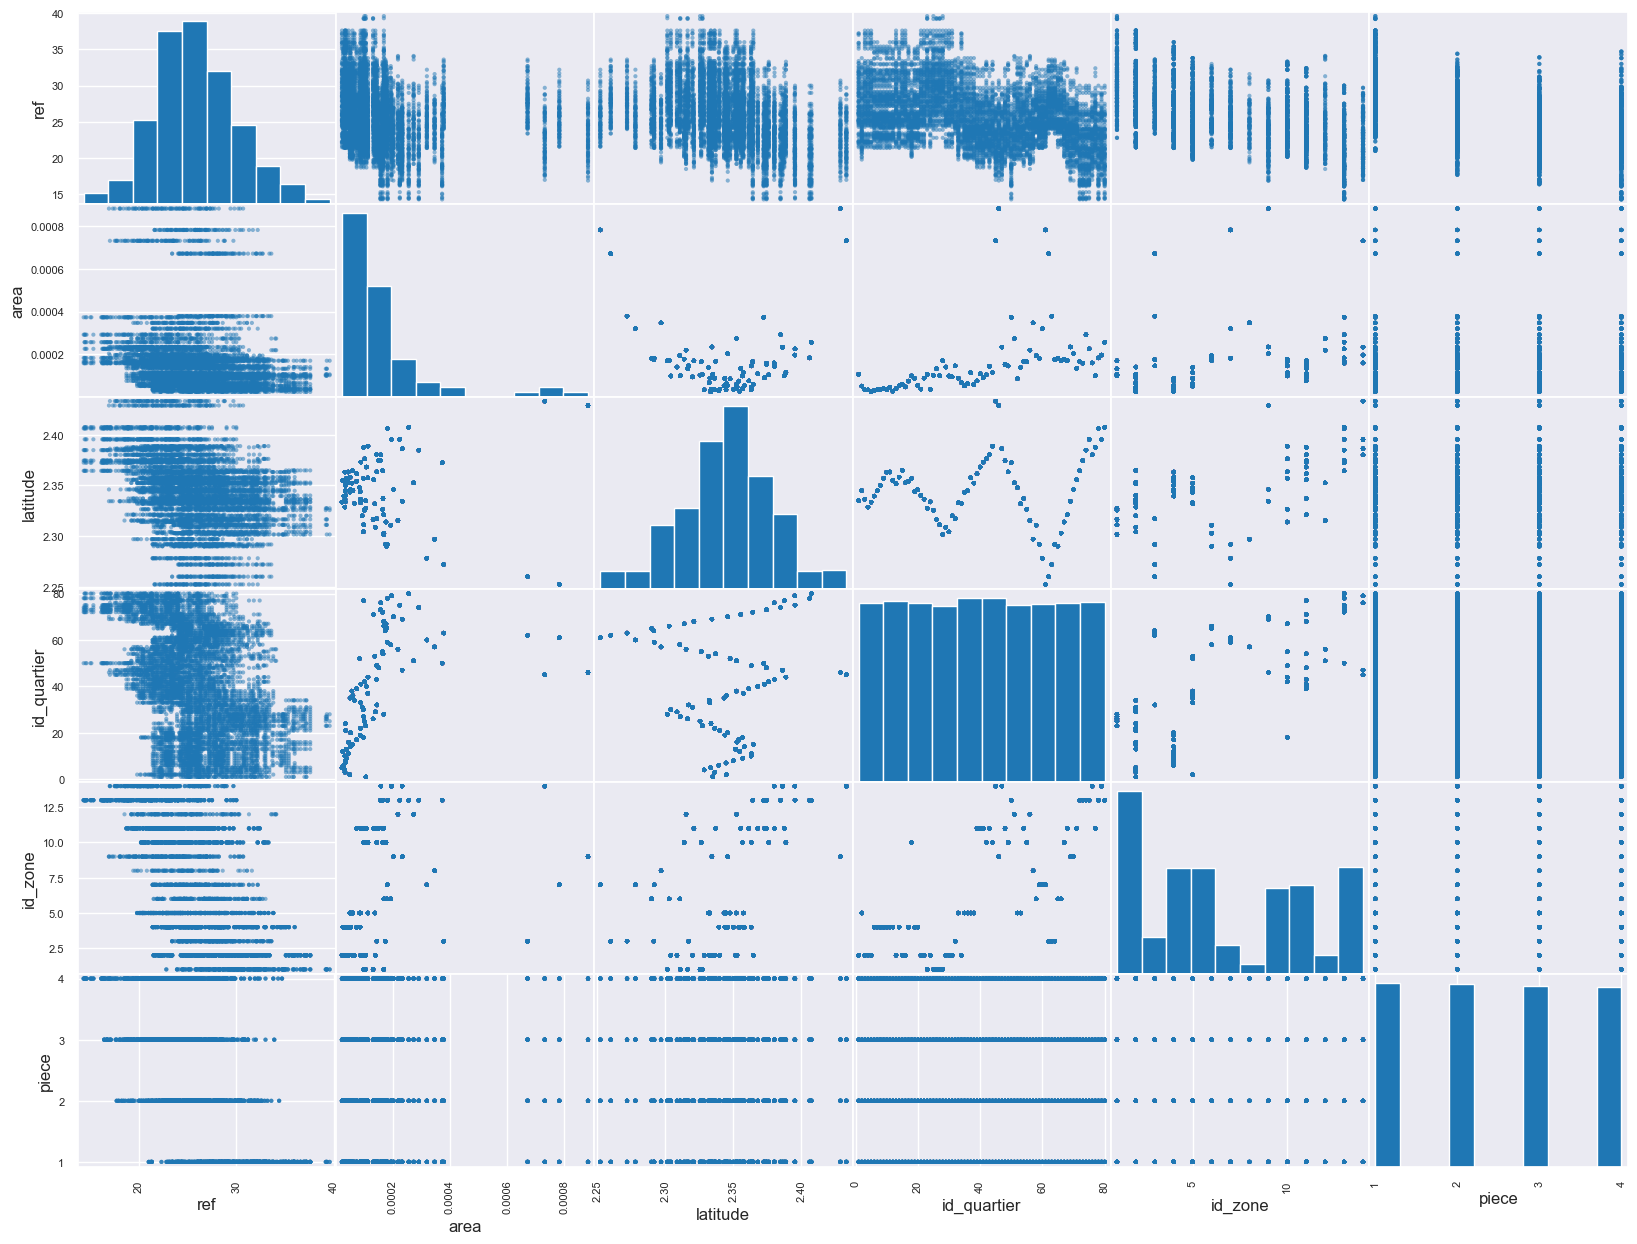

In [56]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["ref", "area", "latitude", "id_quartier", "id_zone", "piece"]
scatter_matrix(gdf[attributes], figsize=(20, 15))

In [ ]:
cat_var = [var for var in paris_housing.select_dtypes('object')]
num_var = [var for var in paris_housing.select_dtypes(include=['float64', 'int64'])]

print(f'They have {len(cat_var)} caticorical variables: {cat_var}')
print(f'They have {len(num_var)} numirical variables: {num_var}')